In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
df = pd.read_csv('442100110323_standard_weather_features.csv')
df['READ_DATE'] = pd.to_datetime(df['READ_DATE'])
df.set_index('READ_DATE', inplace=True)
df

,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_3,lag_7,lag_28,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,2.334143,25.7,96.0,12.9,7.5,0.000000,0.000000,0.000000,0.000000,2.334143,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,-0.017837,-0.000047
2019-01-01 00:15:00,2.344050,25.7,96.0,12.9,7.5,2.334143,0.000000,0.000000,0.000000,2.344050,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,-0.011514,-0.000047
2019-01-01 00:30:00,2.500311,25.7,96.0,12.9,7.5,2.344050,0.000000,0.000000,0.000000,2.500311,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.008583,-0.000047
2019-01-01 00:45:00,2.432096,25.7,96.0,12.9,7.5,2.500311,2.334143,0.000000,0.000000,2.432096,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.064360,-0.000047
2019-01-01 01:00:00,2.388465,25.7,96.0,12.9,7.5,2.432096,2.344050,0.000000,0.000000,2.388465,...,1.0,0.866025,0.5,0.120537,0.992709,0.017166,0.999853,7.684237,0.045630,-0.000047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,69.132420,29.8,68.0,0.0,10.8,69.132420,69.132420,65.469139,63.243948,69.132420,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,-0.035359,-0.000047
2024-05-31 23:00:00,69.132420,29.8,68.0,0.0,10.8,69.132420,69.132420,65.559856,63.452988,69.132420,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,-0.003232,-0.000047
2024-05-31 23:15:00,68.774401,29.8,68.0,0.0,10.8,69.132420,69.132420,66.302510,63.512601,68.774401,...,-1.0,-0.866025,-0.5,0.464723,-0.885456,0.507415,-0.861702,7.684237,0.030413,-0.000047


In [4]:
# split data train dan test. 3 tahun pertama untuk train, 2 tahun terakhir untuk test
train = df.loc['2019-01-01':'2022-12-31']
test = df.loc['2023-01-01':]

In [5]:
scaler = StandardScaler()

In [6]:
# scaling data train
train_scaled = scaler.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns, index=train.index)
train_scaled



,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_3,lag_7,lag_28,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,-0.926090,-1.510370,2.072502,0.764111,-0.170246,-1.205025,-1.205015,-1.204993,-1.204902,-0.926090,...,1.189486,1.321971,0.482817,0.170046,1.396816,0.024252,1.418372,-0.297649,-0.595675,-0.000021
2019-01-01 00:15:00,-0.924906,-1.510370,2.072502,0.764111,-0.170246,-0.926085,-1.205015,-1.204993,-1.204902,-0.924906,...,1.189486,1.321971,0.482817,0.170046,1.396816,0.024252,1.418372,-0.297649,-0.384527,-0.000021
2019-01-01 00:30:00,-0.906232,-1.510370,2.072502,0.764111,-0.170246,-0.924901,-1.205015,-1.204993,-1.204902,-0.906232,...,1.189486,1.321971,0.482817,0.170046,1.396816,0.024252,1.418372,-0.297649,0.286599,-0.000021
2019-01-01 00:45:00,-0.914384,-1.510370,2.072502,0.764111,-0.170246,-0.906227,-0.926076,-1.204993,-1.204902,-0.914384,...,1.189486,1.321971,0.482817,0.170046,1.396816,0.024252,1.418372,-0.297649,2.149186,-0.000021
2019-01-01 01:00:00,-0.919598,-1.510370,2.072502,0.764111,-0.170246,-0.914379,-0.924892,-1.204993,-1.204902,-0.919598,...,1.189486,1.321971,0.482817,0.170046,1.396816,0.024252,1.418372,-0.297649,1.523727,-0.000021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 22:45:00,-0.862522,0.644466,0.566106,2.975064,-2.743848,-0.861293,-0.885876,-0.875391,-1.066700,-0.862522,...,1.189486,-1.321971,0.482817,-0.000701,1.407110,-0.024252,1.418372,-0.900381,-0.384527,0.031559
2022-12-31 23:00:00,-0.855322,0.644466,0.566106,2.975064,-2.743848,-0.862517,-0.883604,-0.857880,-1.067552,-0.855322,...,1.189486,-1.321971,0.482817,-0.000701,1.407110,-0.024252,1.418372,-0.899486,0.286599,0.051134
2022-12-31 23:15:00,-0.857181,0.644466,0.566106,2.975064,-2.743848,-0.855318,-0.861283,-0.883256,-1.073320,-0.857181,...,1.189486,-1.321971,0.482817,-0.000701,1.407110,-0.024252,1.418372,-0.898268,2.149186,0.002900


In [7]:
# scaling data test
test_scaled = scaler.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=test.columns, index=test.index)
test_scaled

,KWH_EXP,Tavg,RH_avg,RR,ss,lag_1,lag_3,lag_7,lag_28,rolling_mean_1,...,season_cos,dayofweek_sin,dayofweek_cos,weekofyear_sin,weekofyear_cos,dayofyear_sin,dayofyear_cos,trend,seasonal,residual
READ_DATE,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,-0.851430,0.082335,0.797859,0.266869,-0.204561,-0.858839,-0.857167,-0.883585,-1.071819,-0.851430,...,1.189486,-4.122367e-16,1.156547,-0.000701,1.407110,0.024252,1.418372,-0.898447,0.082257,0.069148
2023-01-01 00:15:00,-0.845244,0.082335,0.797859,0.266869,-0.204561,-0.851425,-0.878368,-0.861265,-1.073512,-0.845244,...,1.189486,-4.122367e-16,1.156547,-0.000701,1.407110,0.024252,1.418372,-0.898437,-0.055639,0.102322
2023-01-01 00:30:00,-0.848134,0.082335,0.797859,0.266869,-0.204561,-0.845240,-0.858830,-0.862490,-1.076544,-0.848134,...,1.189486,-4.122367e-16,1.156547,-0.000701,1.407110,0.024252,1.418372,-0.898009,0.549754,0.075122
2023-01-01 00:45:00,-0.871030,0.082335,0.797859,0.266869,-0.204561,-0.848129,-0.851416,-0.855290,-1.078695,-0.871030,...,1.189486,-4.122367e-16,1.156547,-0.000701,1.407110,0.024252,1.418372,-0.897633,1.647691,-0.060099
2023-01-01 01:00:00,-0.842770,0.082335,0.797859,0.266869,-0.204561,-0.871026,-0.845231,-0.857149,-1.073512,-0.842770,...,1.189486,-4.122367e-16,1.156547,-0.000701,1.407110,0.024252,1.418372,-0.897749,0.999345,0.092556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 22:45:00,7.056613,2.330858,-1.172043,-0.381322,0.962138,7.056597,7.056567,6.618735,6.352590,7.056613,...,-0.840700,-1.321971e+00,-0.864643,0.657605,-1.254965,0.716858,-1.216982,-0.297649,-1.180782,-0.000021
2024-05-31 23:00:00,7.056613,2.330858,-1.172043,-0.381322,0.962138,7.056597,7.056567,6.629575,6.377569,7.056613,...,-0.840700,-1.321971e+00,-0.864643,0.657605,-1.254965,0.716858,-1.216982,-0.297649,-0.107940,-0.000021
2024-05-31 23:15:00,7.013828,2.330858,-1.172043,-0.381322,0.962138,7.056597,7.056567,6.718324,6.384693,7.013828,...,-0.840700,-1.321971e+00,-0.864643,0.657605,-1.254965,0.716858,-1.216982,-0.297649,1.015589,-0.000021


In [8]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [9]:
# jika datanya diambil setiap 15 menit, maka time_steps = 96 berarti 24 jam

time_steps = 96
# reshape ke bentuk 3D array
X_train, y_train = create_dataset(train_scaled, train_scaled['KWH_EXP'], time_steps)
X_test, y_test = create_dataset(test_scaled, test_scaled['KWH_EXP'], time_steps)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(140160, 96, 56) (140160,)
(49536, 96, 56) (49536,)


In [10]:
model = Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=1))

2024-11-03 12:17:05.777868: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/anaconda/envs/azureml_py38/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 96, 128)        │        94,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 144,193 (563.25 KB)

 Trainable params: 144,193 (563.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
#  callback
# early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')
# learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * np.exp(-0.1)
    
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler)

# training
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    steps_per_epoch=280,
    validation_split=0.1,
    shuffle=False,
    callbacks=[early_stopping, lr_scheduler]
)

Epoch 1/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - loss: 0.0656 - val_loss: 0.2361 - learning_rate: 0.0010
Epoch 2/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 35s 126ms/step - loss: 0.1385 - val_loss: 0.3100 - learning_rate: 0.0010
Epoch 3/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 35s 125ms/step - loss: 0.0555 - val_loss: 0.2970 - learning_rate: 0.0010
Epoch 4/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 35s 126ms/step - loss: 0.0694 - val_loss: 0.1943 - learning_rate: 0.0010
Epoch 5/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 35s 126ms/step - loss: 0.0062 - val_loss: 0.2131 - learning_rate: 0.0010
Epoch 6/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 36s 127ms/step - loss: 0.0232 - val_loss: 0.3197 - learning_rate: 9.0484e-04
Epoch 7/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 36s 128ms/step - loss: 0.0163 - val_loss: 0.1898 - learning_rate: 8.1873e-04
Epoch 8/100
280/280 ━━━━━━━━━━━━━━━━━━━━ 36s 129ms/step - loss: 0.0383 - val_loss: 0.1187 - learning_rate: 7.40

2024-11-03 12:17:08.855682: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2712600576 exceeds 10% of free system memory.
2024-11-03 12:25:30.927500: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/anaconda/envs/azureml_py38/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-11-03 12:34:02.630107: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


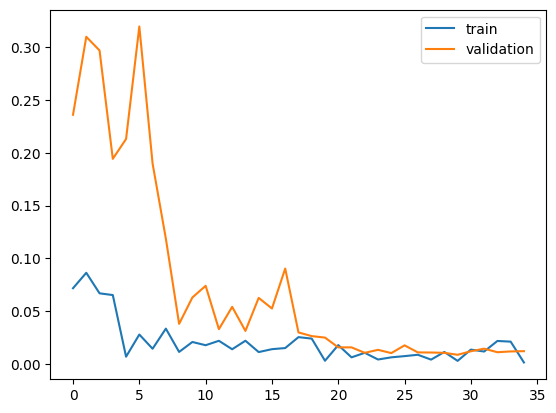

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [14]:
# predict

y_pred = model.predict(X_test)
y_pred = y_pred.reshape(-1)
y_test = y_test.reshape(-1)


1548/1548 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step


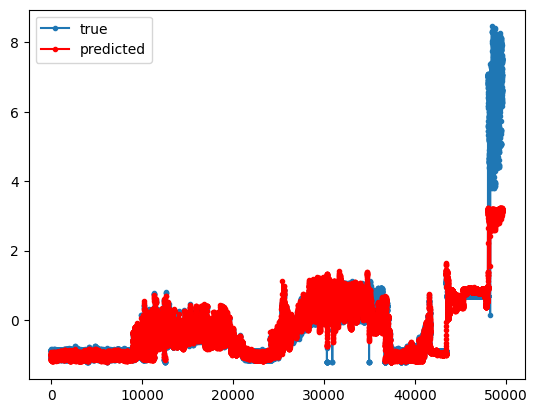

In [15]:
plt.plot(y_test, marker='.', label='true')
plt.plot(y_pred, 'r', marker='.', label='predicted')
plt.legend()
plt.show()

In [16]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MSE: 0.38772241593833706
MAE: 0.1993638829539242
R2: 0.7843527855932095
MAPE: 2.0210172804654243
